In [20]:
import pandas as pd

file1_train = 'data/감성대화말뭉치(최종데이터)_Training.csv'
file1_test = 'data/감성대화말뭉치(최종데이터)_Validation.csv'

train1  = pd.read_csv(file1_train)
test1 = pd.read_csv(file1_test)

### 문장, 감정 대분류 칼럼만 남기고 순서바꾸기

In [21]:
# 대분류, 문장 칼럼만 추출
train1 = train1[['감정_대분류','사람문장1']]
test1 = test1[['감정_대분류','사람문장1']]

# # 감정을 정수 라벨로 변경
# emotions = {'기쁨': 0, '불안': 1, '당황': 2, '슬픔': 3, '분노': 4, '상처': 5}
# train1['emotion'] = train1.emotion.map(emotions)

#칼럼이름 변경하고 순서 바꾸기
train1.columns = ['emotion', 'sentence']
test1.columns = ['emotion', 'sentence']  
train1 = train1.reindex(columns=['sentence', 'emotion'])
test1 = test1.reindex(columns=['sentence', 'emotion'])

train1.sample(n=5)

,sentence,emotion
35437,오늘 식당에서 친구가 내 뒷담화하는 말을 우연히 들었어. 평상시에 내 앞에서는 잘하...,상처
22101,전과 달리 이젠 퇴근하면 나를 기다려주는 아내랑 두 아이가 있어서 행복해.,기쁨
39587,돈은 없지만 애들 뒷바라지는 책임지고 다 했지.,당황
19816,아내가 화장실에 다녀오면 처리를 안 해서 당황스러워.,분노
17832,사업에 대한 꿈을 못 버린 큰 아들이 자꾸만 금전적으로 사고를 쳐.,분노


### 데이터 수 & 결측치 확인

In [22]:
print(train1.info(),end ='\n\n')
print(test1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51630 entries, 0 to 51629
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  51630 non-null  object
 1   emotion   51630 non-null  object
dtypes: object(2)
memory usage: 806.8+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6641 entries, 0 to 6640
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  6641 non-null   object
 1   emotion   6641 non-null   object
dtypes: object(2)
memory usage: 103.9+ KB
None


In [23]:
print(train1.isnull().sum(), end = '\n\n')
print(test1.isnull().sum())

sentence    0
emotion     0
dtype: int64

sentence    0
emotion     0
dtype: int64


### 감성 대화 말뭉치 합쳐서 csv 파일로 다시 저장

In [ ]:
# file_names = ['data/감성대화말뭉치(최종데이터)_Training.csv','data/감성대화말뭉치(최종데이터)_Validation.csv']
# for file_name in file_names:
#     temp = pd.read_csv(file_name, sep='구분자', encoding='utf-8') #csv파일을 하나씩 열어 임시 데이터프레임으로 생성한다
#     total = pd.concat([total, temp]) #전체 데이터프레임에 추가하여 넣는다

# total.to_csv("data/감성대화망뭉치(병합).csv")

In [28]:
# 전처리된 데이터프레임 합치고 csv로 저장   
temp  = pd.concat([train1, test1])
temp    #행 숫자보면 합쳐진거 맞는데 왜 test1 행번호가 그대로일까..

,sentence,emotion
0,일은 왜 해도 해도 끝이 없을까? 화가 난다.,분노
1,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,분노
2,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,분노
3,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,분노
4,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,분노
...,...,...
6636,나랑 비슷한 시기에 결혼하는 친구는 시댁에서 집을 해줘서 너무 부러워. 우리는 대출...,당황
6637,친구 한 명이 결혼해서 아이를 가졌는데 너무 행복해 보이더라. 기분이 좋지만은 않아.,당황
6638,남들은 결혼 전에 일억을 모았다는데 난 뭐를 한 것인지 모르겠어. 자괴감만 드네.,당황
6639,나보다 결혼을 먼저 한 친구가 부러워. 그 친구 남편은 직장도 내 남편보다 좋고 키...,당황


In [33]:
temp.to_csv("data/감성대화망뭉치(병합).csv")

TypeError: NDFrame.to_csv() got an unexpected keyword argument 'index_col'

=> train : test 비율 차이가 많이나서 합치고 모델 만들 때 분리하는게 나아 보임

In [36]:
# 다시 불러와서
train1  = pd.read_csv("data/감성대화망뭉치(병합).csv", index_col=0) #첫 번째 열이 인덱스 열일 때 Unnamed: 0 빼기
train1
# train1.sample(n=5)

,sentence,emotion
0,일은 왜 해도 해도 끝이 없을까? 화가 난다.,분노
1,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,분노
2,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,분노
3,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,분노
4,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,분노
...,...,...
6636,나랑 비슷한 시기에 결혼하는 친구는 시댁에서 집을 해줘서 너무 부러워. 우리는 대출...,당황
6637,친구 한 명이 결혼해서 아이를 가졌는데 너무 행복해 보이더라. 기분이 좋지만은 않아.,당황
6638,남들은 결혼 전에 일억을 모았다는데 난 뭐를 한 것인지 모르겠어. 자괴감만 드네.,당황
6639,나보다 결혼을 먼저 한 친구가 부러워. 그 친구 남편은 직장도 내 남편보다 좋고 키...,당황


### **감정 별 문장 분포**

In [31]:
# 감정 분포 확인
train1.groupby('emotion').count().iloc[:,0]

emotion
기쁨     7339
당황     9804
분노    10417
불안    10433
상처    10150
슬픔    10128
Name: Unnamed: 0, dtype: int64

c:\Users\KangIW\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\KangIW\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\KangIW\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\KangIW\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49256 (\N{HANGUL SYLLABLE BBEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\KangIW\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtool

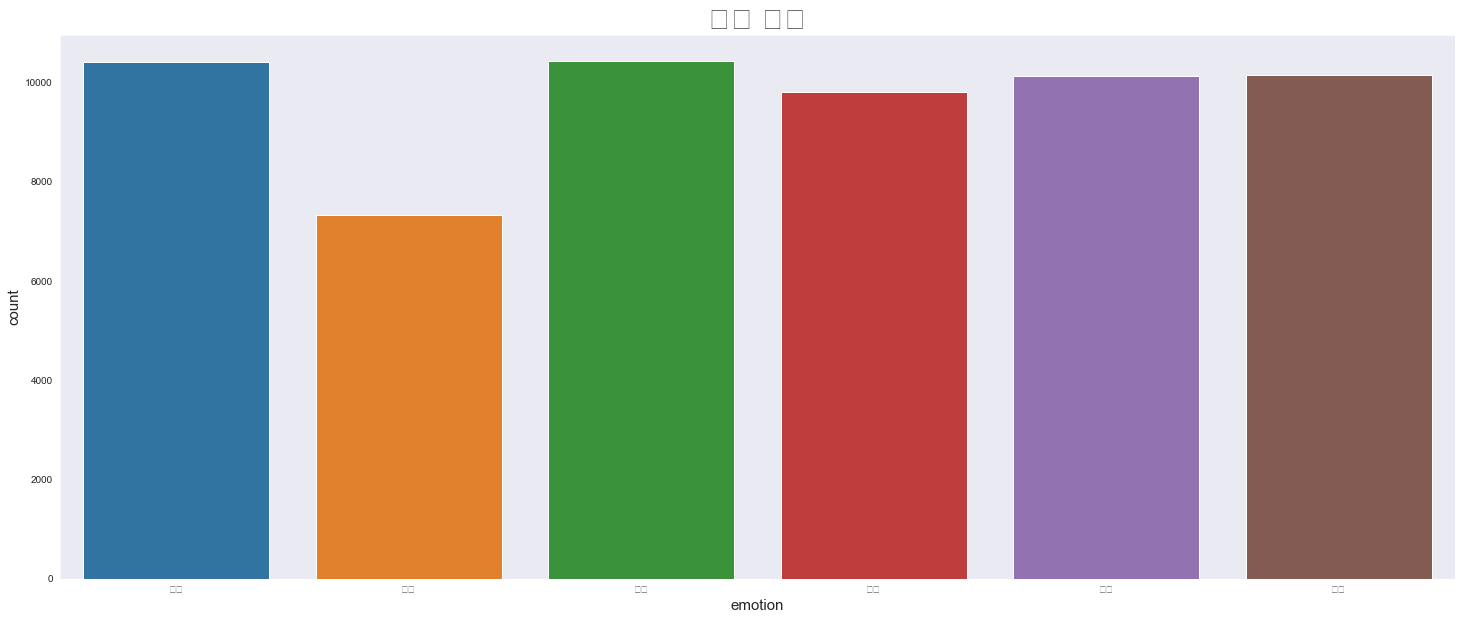

In [50]:
# countplot으로 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumGothic')
plt.rcParams['figure.figsize'] = [25,10]
sns.set_style("dark")
sns.countplot(x='emotion',data=train1)
plt.title('감정 분포', fontsize=30)
plt.xlabel('emotion', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.show()

# 정규화 필요한가?